<h1 style="font-size:300%; font-family:cursive; background:#ff6666; color:white; text-align:center; border:10px solid ; padding:25px;">PIMA DIABETES - EDA | MODEL BUILDING </h1>

<center><img src="https://www.purdue.edu/hr/CHL/no-cost_Wellness/images/diabetes-banner.jpg"></center>

<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>Problem Statement:</b><h2>
    
<p style="font-size:100%; font-family:Geneva">Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports.</p>
<p style="font-size:100%; font-family:Geneva">So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.</p>
    
<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>What is Diabetes ?</b><h2>
<ul>
    <li style="font-size:100%; font-family:Geneva">Diabetes is a group of diseases in which the body doesn’t produce enough or any insulin, doesn’t properly use the insulin that is produced, or exhibits a combination of both. When any of these things happens, the body is unable to get sugar from the blood into the cells. That leads to high blood sugar levels.</li>
    <br>
    <li style="font-size:100%; font-family:Geneva">Glucose, the form of sugar found in your blood, is one of your main energy sources. A lack of insulin or resistance to insulin causes sugar to build up in your blood. This can lead to many health problems.</li>
    <br>
    <li style="font-size:100%; font-family:Geneva">The three main types of diabetes are: <b>type 1 diabetes, type 2 diabetes, gestational diabetes</b>.</li>
</ul>
    
<h2 style="font-size:250%; font-family:cursive; color:#ff6666;"><b>About Dataset:</b><h2>    
<ul>
    <li style="font-size:100%; font-family:Geneva"><b>Pregnancies:</b> No. of times pregnant</li>
    <li style="font-size:100%; font-family:Geneva"><b>Glucose:</b> Plasma Glucose Concentration (mg/dl)</li>
    <li style="font-size:100%; font-family:Geneva"><b>Blood Pressure:</b> Diastolic Blood Pressure(mmHg)</li>
    <li style="font-size:100%; font-family:Geneva"><b>Skin Thickness:</b>A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.</li>
    <li style="font-size:100%; font-family:Geneva"><b>Insulin:</b> 2-Hour Serum Insulin (mu U/ml)</li>
    <li style="font-size:100%; font-family:Geneva"><b>BMI:</b> Body Mass Index (weight in kg/ height in m2)</li>
    <li style="font-size:100%; font-family:Geneva"><b>Diabetes Pedigree Function:</b>  It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.</li>
    <li style="font-size:100%; font-family:Geneva"><b>Age:</b>Age (years)</li>
    <li style="font-size:100%; font-family:Geneva"><b>Outcome:</b> Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.</li>
</ul>


<h1 style="font-size:300%; font-family:cursive; background:#ff6666; color:white; text-align:center; border:10px solid; padding:25px;">IMPLEMENTATION USING PYTHON</h1>

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>1. Import Libraries & Load Dataset</b></h3></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import missingno as msno

In [3]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<ul>
    <li style="font-size:180%; font-family:Geneva;">There are some values in Insulin, that cannot be zero. So, need to handle them by imputing.</li>
</ul>

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>2. Descriptive Statistics of Data</b></h3></center>

In [4]:
# see the column names and its datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#shape:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<ul>
    <li style="font-size:180%; font-family:Geneva;">There is a huge variation in mean, and we can see there's no missing values, but for some of the columns like Glucose , BP, Skin Thickness,BMI has 0 as min value, which is not possible, hence we can treat this as missingvalues and impute accordingly.</li>
</ul>

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>3. Handle the Columns with value '0'</b></h3></center>

In [7]:
features = df.columns
cols = (df[features] == 0).sum()
print(cols)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


<ul>
    <li style="font-size:180%; font-family:Geneva;">We cannot drop these values, as our data is very small. So let's handle them.</li>
</ul>

In [8]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

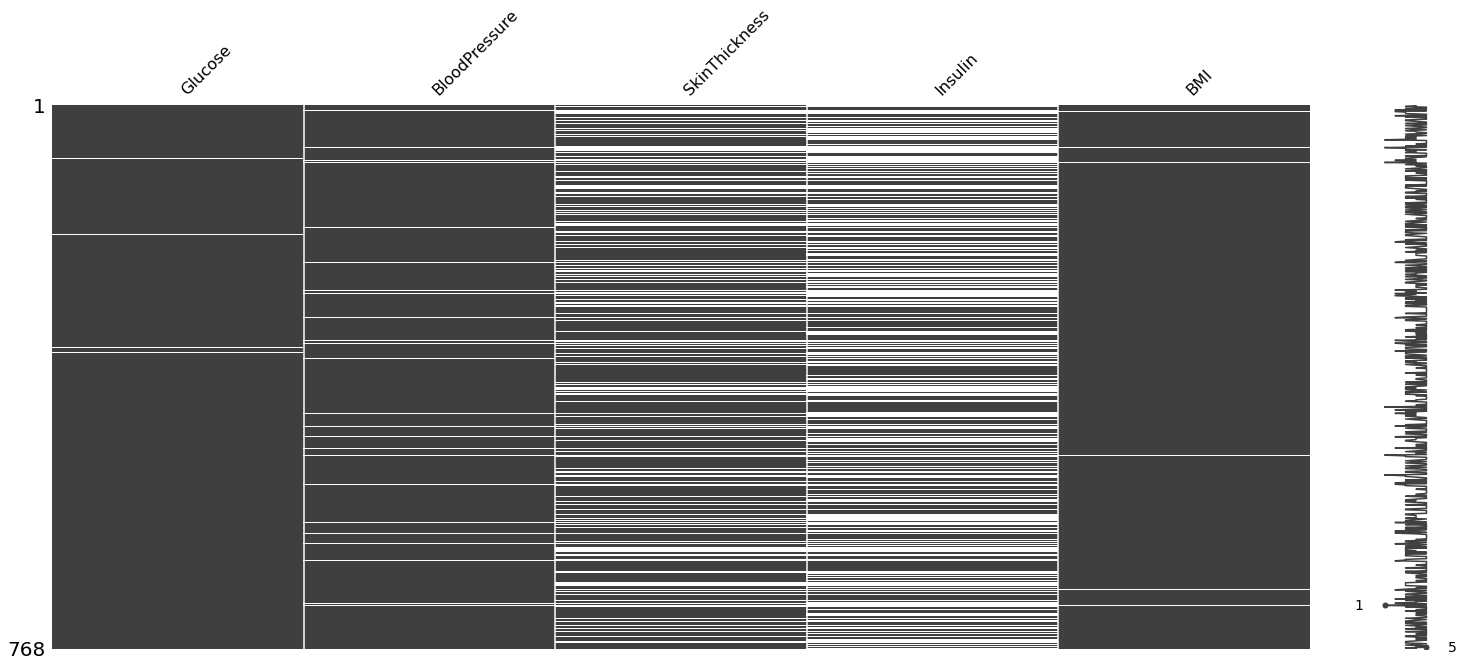

In [10]:
msno.matrix(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>3.1 Handle: Glucose, BloodPressure, BMI</b><h4>

In [11]:
#Replace the null values with the median of that column:

df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>3.2 Handle: Insulin based on Glucose</b><h4>

In [12]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [13]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>3.3 Skinthickness with respect to BMI</b><h4>

In [14]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [15]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<p style="font-size:180%; font-family:Geneva; text-align:center;"><b>"MISSING VALUES ARE HANDLED"</b></p>

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>4. Visualization of Target Variable</b></h3></center>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7af00710d0>],
      dtype=object)

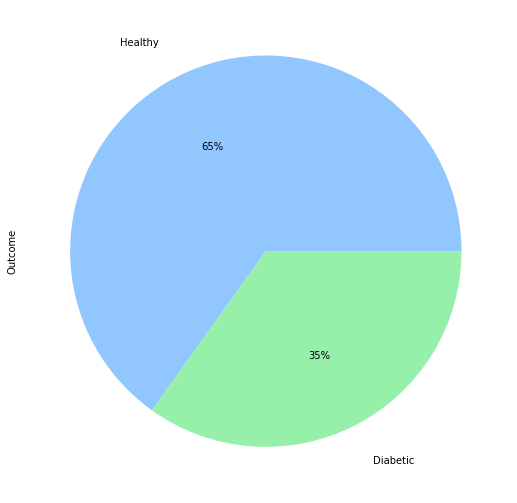

In [17]:
import matplotlib.style as style
style.available

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', labeldistance=1.2, figsize=(9,9))

Samples of diabetic people:  268
Samples of healthy people:  500


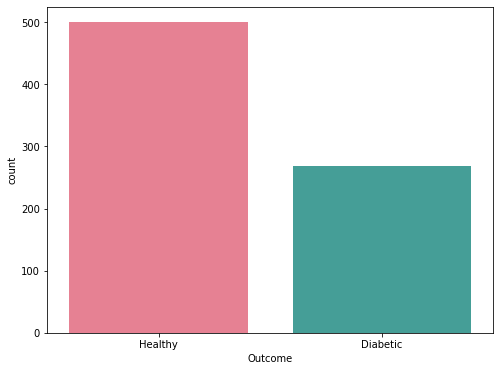

In [18]:
from matplotlib.pyplot import figure, show

figure(figsize=(8,6))
ax = sns.countplot(x=df['Outcome'], data=df,palette="husl")
ax.set_xticklabels(["Healthy","Diabetic"])
healthy, diabetics = df['Outcome'].value_counts().values
print("Samples of diabetic people: ", diabetics)
print("Samples of healthy people: ", healthy)

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>5. Distribution of other features w.r.t Outcome</b></h3></center>

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.1 Distribution of Pregnancies</b><h4>

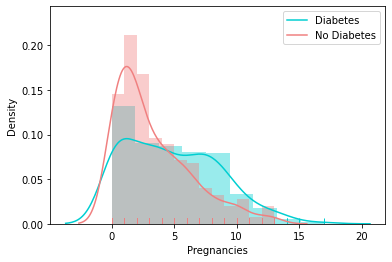

In [19]:
plt.figure()
ax = sns.distplot(df['Pregnancies'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Pregnancies'][df.Outcome == 0], color ="lightcoral",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.2 Distribution of Glucose</b><h4>

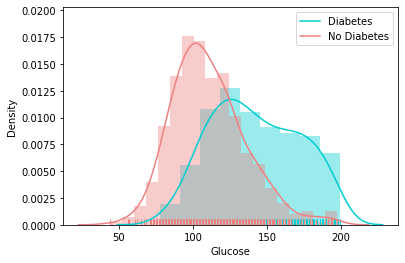

In [20]:
plt.figure()
ax = sns.distplot(df['Glucose'][df.Outcome == 1], color ="darkturquoise", rug = True)
sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightcoral", rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.3 Distribution of BloodPressure</b><h4>

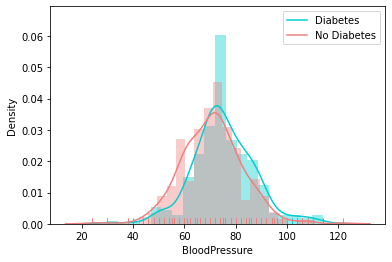

In [21]:
plt.figure()
ax = sns.distplot(df['BloodPressure'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BloodPressure'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.4 Distribution of SkinThickness</b><h4>

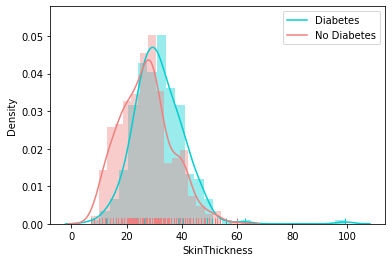

In [22]:
plt.figure()
ax = sns.distplot(df['SkinThickness'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['SkinThickness'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.5 Distribution of Insulin</b><h4>

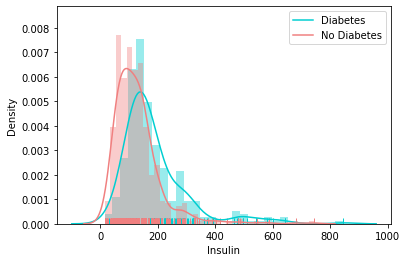

In [23]:
plt.figure()
ax = sns.distplot(df['Insulin'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Insulin'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.6 Distribution of BMI</b><h4>

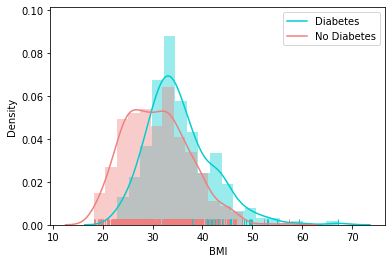

In [24]:
plt.figure()
ax = sns.distplot(df['BMI'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['BMI'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.7 Distribution of DiabetesPedigreeFunction</b><h4>

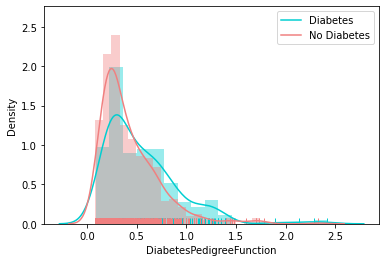

In [25]:
plt.figure()
ax = sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['DiabetesPedigreeFunction'][df.Outcome == 0], color ="lightcoral", rug=True)
plt.legend(['Diabetes', 'No Diabetes'])

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>5.8 Distribution of Age</b><h4>

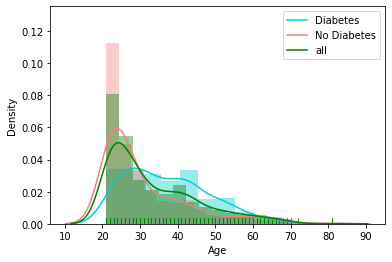

In [25]:
plt.figure()
ax = sns.distplot(df['Age'][df.Outcome == 1], color ="darkturquoise", rug=True)
sns.distplot(df['Age'][df.Outcome == 0], color ="lightcoral", rug=True)
sns.distplot(df['Age'], color ="green", rug=True)
plt.legend(['Diabetes', 'No Diabetes', 'all'])

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>6. BoxPlot to check for Outliers</b></h3></center>

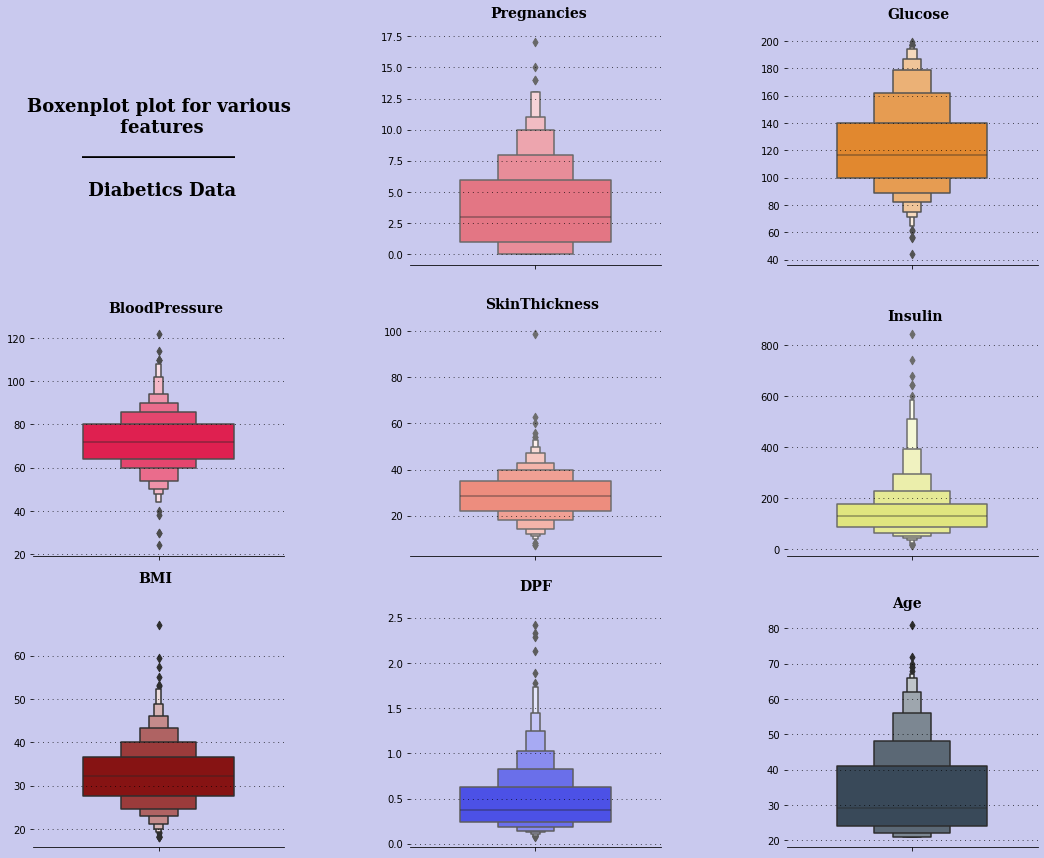

In [27]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
# c9c9ee
color_palette = ["#f56476","#ff8811","#ff0040","#ff7f6c","#f0f66e","#990000"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color)
ax6.set_facecolor(background_color)
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)

# Title of the plot
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Boxenplot plot for various\n features\n_________________\n\n Diabetics Data',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

# Pregnancies 
ax1.text(-0.18, 19, 'Pregnancies', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Glucose 
ax2.text(-0.1, 217, 'Glucose', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
ax2.set_xlabel("")
ax2.set_ylabel("")

# BloodPressure 
ax3.text(-0.20, 132, 'BloodPressure', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
ax3.set_xlabel("")
ax3.set_ylabel("")

# SkinThickness 
ax4.text(-.2, 110, 'SkinThickness', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
ax4.set_xlabel("")
ax4.set_ylabel("")

# Insulin 
ax5.text(-0.10, 900, 'Insulin', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#f0f66e"],width=0.6)
ax5.set_xlabel("")
ax5.set_ylabel("")

# BMI 
ax6.text(-0.08, 77, 'BMI', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#990000"],width=0.6)
ax6.set_xlabel("")
ax6.set_ylabel("")

# DPF 
ax7.text(-0.065, 2.8, 'DPF', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax7,y=df['DiabetesPedigreeFunction'],palette=["#3339FF"],width=0.6)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Age 
ax8.text(-0.08, 86, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#34495E"],width=0.6)
ax8.set_xlabel("")
ax8.set_ylabel("")



for s in ["top","right","left"]:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>7. Correlation Matrix </b></h3></center>

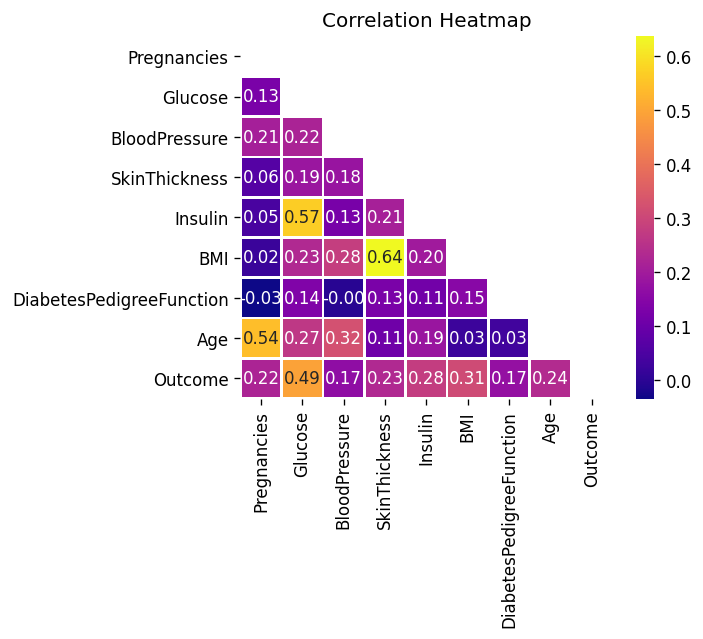

In [26]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>8. Pair Plot</b></h3></center>

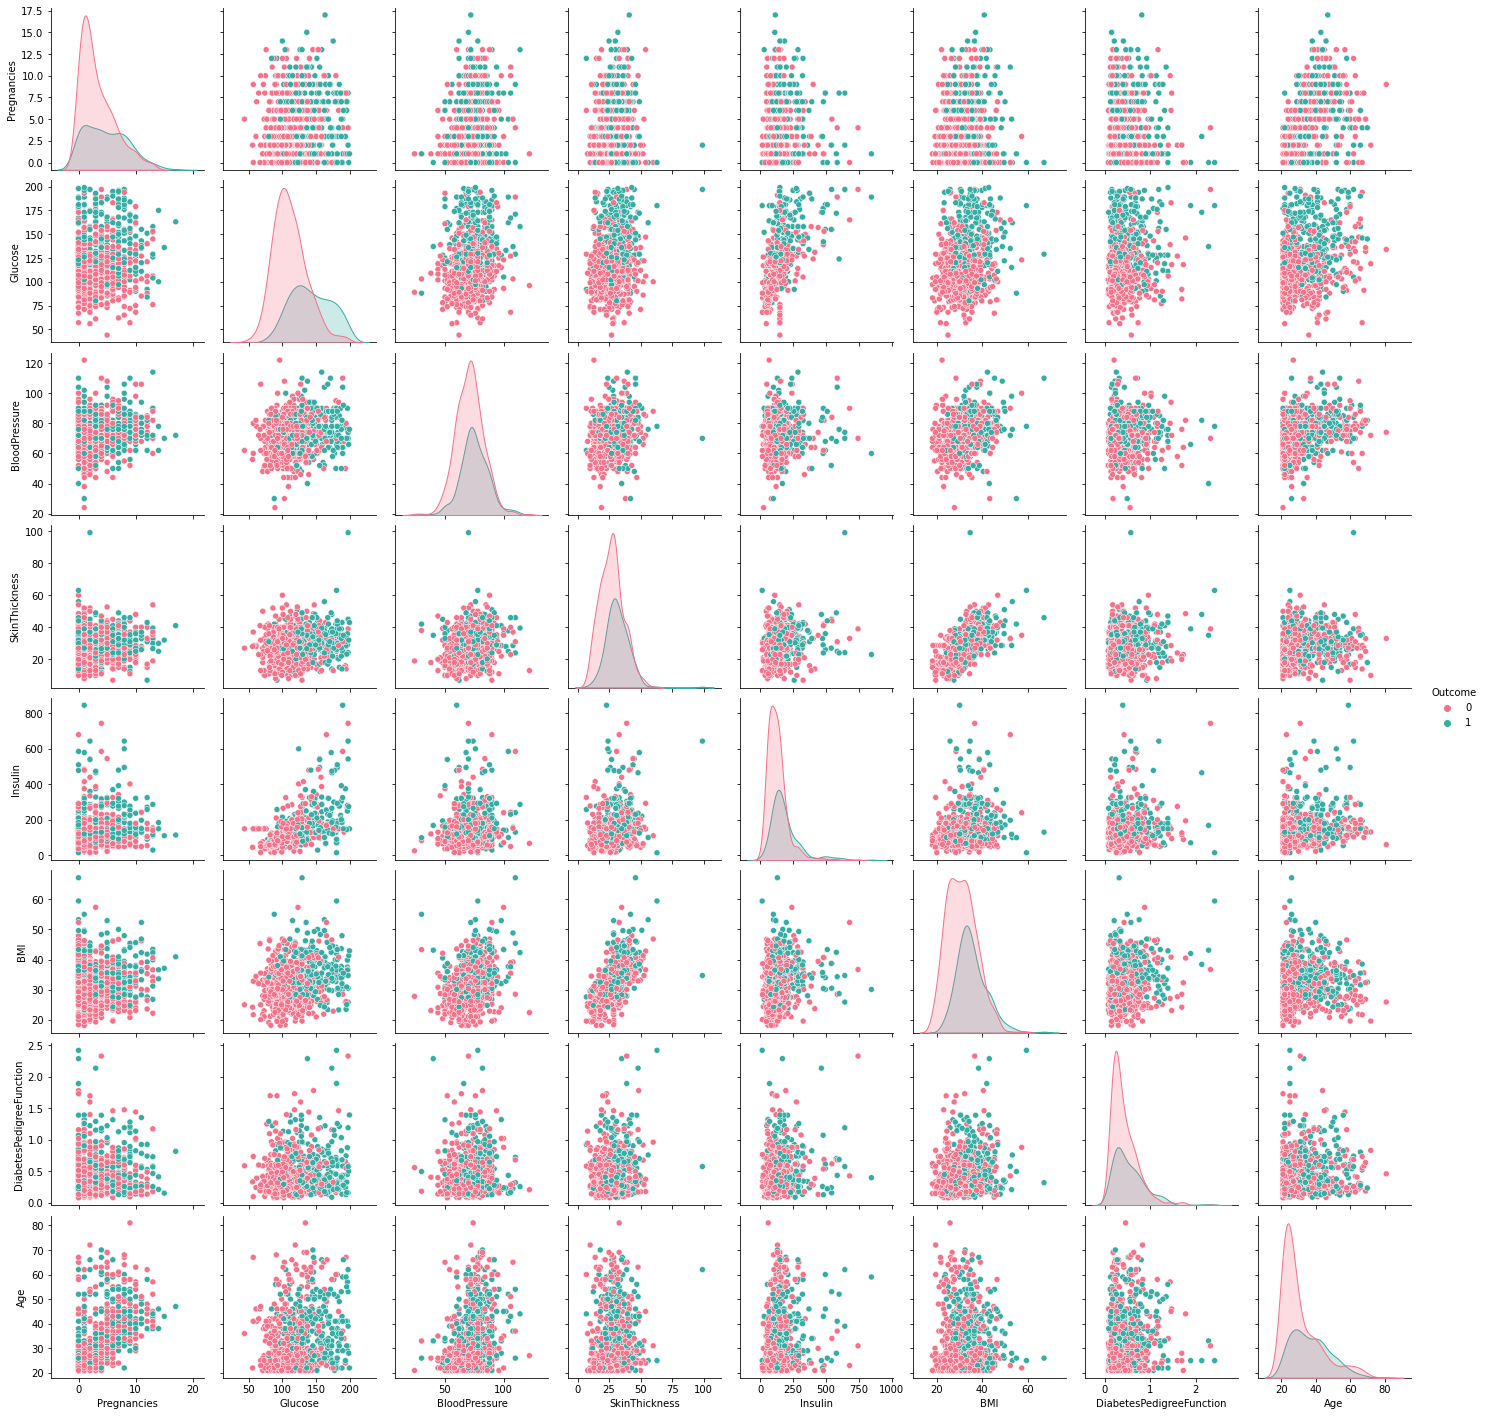

In [29]:
sns.pairplot(df, hue="Outcome",palette="husl")

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>9. MODEL BUILDING</b></h3></center>

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>9.1 Split the data into test & train</b></h4>
<ul>
    <li style="font-size:150%; font-family:Geneva;">The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.</li>
</ul>


In [27]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [29]:
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (614, 8)
Number transactions y_train dataset:  (614,)
Number transactions x_test dataset:  (154, 8)
Number transactions y_test dataset:  (154,)


<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>9.2 Feature Scaling</b></h4>
<ul>
    <li style="font-size:150%; font-family:Geneva;">Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.</li>
    <li style="font-size:150%; font-family:Geneva;"><b>Standard Scaler</b>: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.</li>
</ul>


In [30]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,accuracy_score,auc

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>9.3 SVM Model</b></h4>

<ul>
    <li style="font-size:150%; font-family:Geneva;">Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.</li>
    <li style="font-size:150%; font-family:Geneva;">The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.</li>
</ul>

In [32]:
from sklearn.svm import SVC

model=SVC(kernel='rbf')
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7727272727272727

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       107
           1       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154



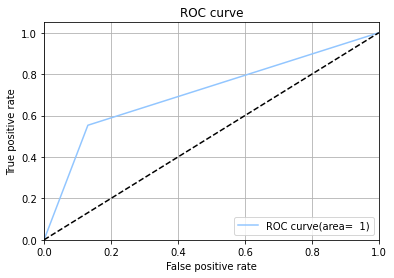

In [35]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>9.4 Random Forest Model</b></h4>
<ul>
    <li style="font-size:150%; font-family:Geneva;">Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.</li>
    <li style="font-size:150%; font-family:Geneva;">This works well because a single decision tree may be prone to a noise, but aggregate of many decision trees reduce the effect of noise giving more accurate results.</li>
</ul>

In [36]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
Y_pred=classifier.predict(x_test)
accuracy_score(y_test,Y_pred)

0.8116883116883117

In [38]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       107
           1       0.72      0.62      0.67        47

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.81      0.81      0.81       154



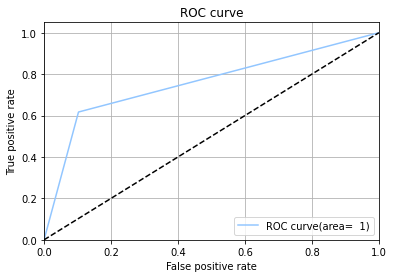

In [39]:
fpr,tpr,_=roc_curve(y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h4 style="font-size:150%; font-family:cursive; color:#ff6666;"><b>9.5 KNN Model</b></h4>
<ul>
    <li style="font-size:150%; font-family:Geneva;">K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. It can be used for Regression as well as for Classification but mostly it is used for the Classification problems.</li>
    <li style="font-size:150%; font-family:Geneva;">K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.</li>
</ul>

In [40]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3) 
clf.fit(x_train,y_train)  
print(clf.score(x_test,y_test))

0.7337662337662337


In [41]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       107
           1       0.57      0.49      0.53        47

    accuracy                           0.73       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.72      0.73      0.73       154



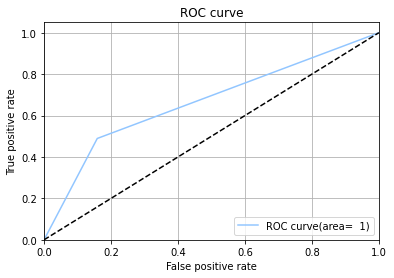

In [42]:
fpr,tpr,_=roc_curve(y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<center><h3 style="font-size:200%; font-family:cursive; color:#ff6666;"><b>10. Conclusion</b></h3></center>

<p style="font-size:180%; font-family:cursive;">In this kernel, we have performed Exploratory Data Analysis, Data Preprocessing, Visualization of Features, Correlation Matrix, Model Building (SVM, RF, KNN).</p>

<h1 style="font-size:200%; font-family:cursive; color:green; text-align:center;">Thank You!</h1> 